In [129]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from scipy import linalg
np.set_printoptions(suppress=True)

def plot_vectors(vs):
    """Plot vectors in vs assuming origin at (0,0)."""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

# Linear Algebra and Linear Systems

A lot of problems in statistical computing can be described mathematically using linear algebra.  This lecture is meant to serve as a review of concepts you have covered in linear algebra courses.

## Motivation - Simultaneous Equations

Consider a set of $m$ linear equations in $n$ unknowns:




\begin{align*}
a_{11} x_1 + &a_{12} x_2& +& ... + &a_{1n} x_n &=& b_1\\
\vdots  && &&\vdots &= &\vdots\\
a_{m1} x_1 + &a_{m2} x_2& +& ... + &a_{mn} x_n &=&b_m 
\end{align*}



We can let:



In [70]:
%%latex
$$\begin{align*}
    A=\left[\begin{matrix}a_{11}&\cdots&a_{1n}\\
               \vdots & &\vdots\\
               a_{m1}&\cdots&a_{mn}\end{matrix}\right], & & 

x = \left[\begin{matrix}x_1\\
               \vdots\\
               x_n\end{matrix}\right] & \;\;\;\;\textrm{   and } &
b =  \left[\begin{matrix}b_1\\
               \vdots\\
               b_m\end{matrix}\right]
\end{align*}$$



<IPython.core.display.Latex object>


And re-write the system:
    
$$ Ax = b$$

This reduces the problem to a matrix equation, and now solving the system amounts to finding $A^{-1}$ (or sort of).  Certain properies of the matrix $A$ yield important information about the linear system.

Most students in elementary linear algebra courses learn to use Gaussian elimination to solve systems such as the one above. To understand more advanced techniques and matrix decompositions (more on those later), we'll need to recall some mathematical concepts.

## Vector Spaces

Technically, a vector space is a field of coefficients $\mathbb{F}$, together with a commutative group (over addition) $V$ such that

* If $c\in \mathbb{F}$ and $v\in V$, then $cv\in V$
* If $v_1,v_2 V$ and $c\in \mathbb{F}$ then 
     $c(v_1+v_2) = c v_1 + c v_2$
* If $c_1,c_2\in \mathbb{F}$ and $v\in V$, then
     $(c_1+c_2)v = c_1v + c_2v$
* If $c_1,c_2\in \mathbb{F}$ and $v\in V$, then
     $(c_1c_2)v = c_1(c_2v)$
* If $1$ is the multiplicative identity in $\mathbb{F}$, then 
     $1\cdot v = v$

That may not seem to be particularly useful for the purposes of this course, and for many of our purposes we can simplify this a bit. We are mostly interested in finite dimensional 'real' vector spaces. So our vectors will be elements of $\mathbb{R}^n$, i.e. points in $n$ dimensional space. The 'coefficents' are also real numbers. This leads to the idea that vectors are simply $n$-tuples of numbers. This is a nice, concrete way of seeing things, but it is a little oversimplified. It obscures a bit the need for a basis, and what 'coordinates' actually are. It also doesn't help much when we want to consider vector spaces of things that are not numbers, such as functions (yes - we can do that!! and it is helpful *even in statistics*)

Therefore, I hope you will indulge me and first think of the 'vectors' (usually denoted $u,v,w,x,y$) and the 'coefficients' (usually denoted $a,b,c$) and *fundamentally different objects*. 

### Conceptually: Think of vectors as *linear combinations* of Things(Tm). Think of the $v's$ as objects of some sort (functions, apples, cookies) and the $c's$ as numbers (real, complex, quaternions...)

### Linear Independence and Basis

A collection of vectors $v_1,...,v_n$ is said to be *linearly independent* if

$$c_1v_1 + \cdots c_nv_n = 0$$
$$\iff$$
$$c_1=\cdots=c_n=0$$

In other words, any linear combination of the vectors that results in a zero vector is trivial.

Another interpretation of this is that no vector in the set may be expressed as a linear combination of the others.  In this sense, linear independence is an expression of non-redundancy in a set of vectors.


###Fact: Any linearly independent set of $n$ vectors spans an $n$-dimensional space. (I.e. the collection of all possible linear combinations is $V$ - this is actually the definition of dimension)  Such a set of vectors is said to be a *basis* of $V$.  Another term for basis is *minimal spanning set*. 

### Example

We can consider the vector space of polynomials of degree $\leq 2$ over $\mathbb{R}$. A basis for this space is

$$\left\{1,x,x^2\right\}$$

Any vector may be written

$$c_1\cdot 1 + c_2x + c_3 x^2 = c_1 + c_2 x +c_ 3 x^2$$

where $c_1,c_2,c_3\in \mathbb{R}$

### Coordinates

When we have a set of basis vectors $\left\{v_1,...,v_n\right\}$ for a vector space, as we have said, any vector may be represented as:

$$c_1v_1+...+c_nv_n$$

The $c_i's$ are called *coordinates*. For example, in the space of $2^{nd}$ degree polynomials, the vector:

$$2 x +\pi x^2$$

has coordinates $(0,2,\pi)$.

You probably think of coordinates in terms of the coordinate plane, and equate the coordinates with the $n$-tuples that label the points. This is all true - but skips a step. Now that we have separated our basis vectors from their coordinates, let's see how this applies in the case of the real vector spaces you are accustomed to.

The coordinates of the pictured vector (below) are $(2,3)$. But what does that mean? It means we have assumed the *standard basis*, $\left\{e_1,e_2\right\}$, and the vector $(2,3)$ really means:

$$2e_1 + 3e_2$$

where $e_1$ is a unit vector (length = 1) on the horizontal axis and $e_2$ is a unit vector along the vertical axis. This is a *choice of coordinates*. We could equally well choose the basis $\left\{v,e_2\right\}$ where $v$ is any vector that is linearly independent of $e_1$. Then all vectors would be considered of the form:

$$c_1 v + c_2 e_1$$.



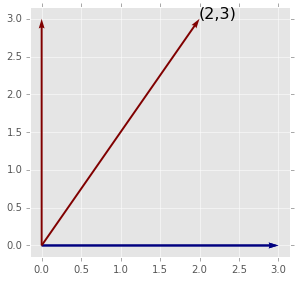

In [67]:
a1 = np.array([3,0])         # axis
a2 = np.array([0,3])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([a1,v1])
plt.text(2,3,"(2,3)",fontsize=16)
plt.tight_layout()


Note that in the standard basis, the coordinates of $e_1$ are $(1,0)$. This is because:

$$e_1 = 1\cdot e_1 + 0\cdot e_2$$

Similarly, the coordinates of $e_2$ are $(0,1)$ because

$$e_2 = 0\cdot e_1 + 1\cdot e_2$$

In the basis $\left\{v,e_1\right\}$, the coordinates of $e_1$ are $(0,1)$, because

$$e_1 = 0\cdot v + 1\cdot e_1$$

and the coordinates of $v$ are $(1,0)$.

Well need these concepts in a moment when we talk about change of basis.

##Matrices and Linear Transformations

So we have this vector space and it consists of linear combinations of vectors. It's not terribly interesting just sitting there. So let's do something with it.

This is mathematics, and once mathematicians have objects collected into some set or 'space', we like to send them to other spaces, or back into the space itself, but changing one object into another. This is called a 'transformation'.

Let's suppose we have two vector spaces, $V$ and $W$. We'd like to define a transformation - but there is a catch. We want our transformation to act on all the vectors. Let's suppose $V=W=\mathbb{R}^2$. That seems simple enough. But there are still infinitely many vectors. Defining a transformation sounds laborious.

Ah, but we are clever. We have defined our space in such a way that for *certain* transformations, we need only define our transformation on a finite set (in the case of finite dimensional vector spaces).

###Linear Transformations

A linear transformation $f:V\rightarrow W$ is a map from $V$ to $W$ such that

$$f(c_1 v_1+c_2v_2) = c_1f(v_1)+c_2f(v_2)$$

Now, recall that a basis essentially generates the entire vector space via linear combinations. So, once we define a linear transformation $f$ on a basis, we have it for the whole space.


### Matrices, Transformations and Geometric Interpretation
Thinking back to real vector spaces, what does a matrix *do* to a vector?  Matrix multiplication has a *geometric* interpretation.  When we multiply a vector, we either rotate, reflect, dilate or some combination of those three. So multiplying by a matrix *transforms* one vector into another vector.  These are *linear transformations*. 

See the cell below for an example of a vector ($v_1 = (2,3)$) transformed by a matrix 

$$A = \left(\begin{matrix}2 & 1\\1&1\end{matrix}\right)$$

so that 

$$v_2 = Av_1$$



5


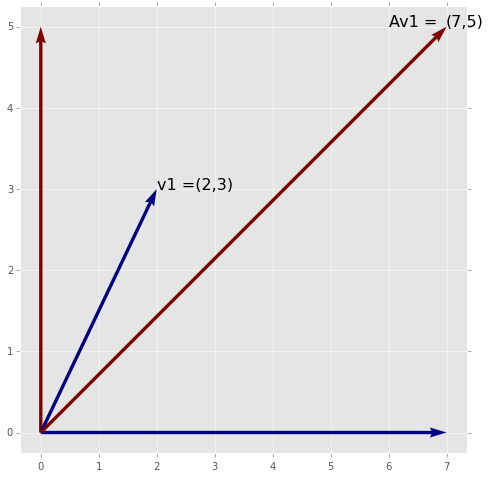

In [103]:
a1 = np.array([7,0])         # axis
a2 = np.array([0,5])

A = np.array([[2,1],[1,1]])  # transformation f in standard basis
v2 =np.dot(A,v1)
plt.figure(figsize=(8,8))
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([v1,v2])
plt.text(2,3,"v1 =(2,3)",fontsize=16)
plt.text(6,5,"Av1 = ", fontsize=16)
plt.text(v2[0],v2[1],"(7,5)",fontsize=16)
print(v2[1])

Important Facts: 

* Any matrix defines a linear transformation
* The matrix form of a linear transformation is NOT unique
* We need only define a transformation by saying what it does to a *basis*

Suppose we have a matrix $A$ that defines some transformation.  We can take any invertible matrix $B$ and

$$BAB^{-1}$$

defines the same transformation.  This operation is called a *change of basis*, because we are simply expressing the transformation with respect to a different basis.

This is an important concept in matrix decompositions.

### Example - Find *a* Matrix Representation of a Linear Transformation

Note that we say find 'a' matrix representation - not 'the' matrix representation. That is because the matrix representation is dependent on the *choice of basis*.

Let $f(x)$ be the linear transformation that takes $e_1=(1,0)$ to $f(e_1)=(2,3)$ and $e_2=(0,1)$ to $f(e_2) = (1,1)$.  A matrix representation of $f$ would be given by:

$$A = \left(\begin{matrix}2 & 1\\3&1\end{matrix}\right)$$

This is the matrix we use if we consider the vectors of $\mathbb{R}^2$ to be linear combinations of the form 

$$c_1 e_1 + c_2 e_2$$


### Example - Change to a Different Basis

Now, consider a second pair of (linearly independent) vectors in $\mathbb{R}^2$, say $v_1=(1,3)$ and $v_2=(4,1)$. We first find the transformation that takes $e_1$ to $v_1$ and $e_2$ to $v_2$.  A matrix representation for this is:

$$B = \left(\begin{matrix}1 & 4\\3&1\end{matrix}\right)$$


Our original transformation $f$ can be expressed with respect to the basis $v_1, v_2$ via

$$BAB^{-1}$$

Here is what the new basis looks like:

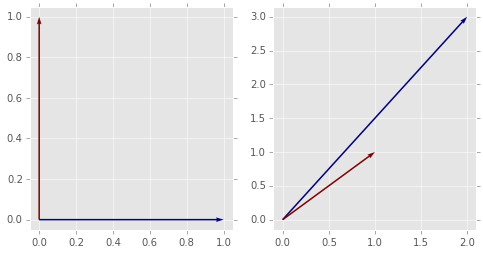

In [139]:
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,1],[3,1]])
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([A.dot(e1), A.dot(e2)])
plt.Circle((0,0),2)
#plt.show()
#plt.tight_layout()

Let's see what the new matrix looks like:

In [109]:
A = np.array([[2,1],[3,1]])  # transformation f in standard basis
e1 = np.array([1,0])         # standard basis vectors e1,e2
e2 = np.array([0,1])

print(A.dot(e1))             # demonstrate that Ae1 is (2,3)
print(A.dot(e2))             # demonstrate that Ae2 is (1,1) 
                              
# new basis vectors
v1 = np.array([1,3])         
v2 = np.array([4,1])

# How v1 and v2 are transformed by A
print("Av1: ")
print(A.dot(v1))   
print("Av2: ")
print(A.dot(v2))

# Change of basis from standard to v1,v2
B = np.array([[1,4],[3,1]])
print(B)
B_inv = linalg.inv(B)

print("B B_inv ")
print(B.dot(B_inv))   # check inverse

# Matrix of the transformation with respect to the new basis
T = B.dot(A.dot(B_inv))        # B A B^{-1}  

print(T)




[2 3]
[1 1]
Av1: 
[5 6]
Av2: 
[ 9 13]
[[1 4]
 [3 1]]
B B_inv 
[[ 1.  0.]
 [ 0.  1.]]
[[ 0.0909  4.6364]
 [ 0.2727  2.9091]]


##What does all this have to do with linear systems?



#### Linear Independence:

* If $A$ is an $m\times n$ matrix and $m>n$, if all $m$ rows are linearly independent, then the system is *overdetermined* and *inconsistent*.  The system cannot be solved exactly.  This is the usual case in data analysis, and why least squares is so important.
 
* If $A$ is an $m\times n$ matrix and $m<n$, if all $m$ rows are linearly independent, then the system is *underdetermined* and there are *infinite* solutions.

* If $A$ is an $m\times n$ matrix and some of its rows are linearly dependent, then the system is *reducible*.  We can get rid of some equations.

* If $A$ is a square matrix and its rows are linearly independent, the system has a unique solution. ($A$ is invertible.)

#### Change of Basis

* We can often transform a linear system into a simpler form, simply via a change of basis.

## More Properties of Vectors, Vector Spaces and Matrices

Linear algebra has a whole lot more to tell us about linear systems, so we'll review a few basics.

### Norms and Distance of Vectors

You probably learned that the 'norm' of a vector $v \in \mathbb{R}^n$, denoted $||v||$ is simply its length. For a vector with components 
$$v = \left(v_1,...,v_n\right)$$
the norm of $v$ is given by:
    
$$||v|| = \sqrt{v_1^2+...+v_n^2}$$

This *natural* definition of a norm comes from the distance formula. Recall that for two points $(x_1,y_1),(x_0,y_0)$ in the plane, the distance between them is given by:

$$D = \sqrt{(x_1-x_0)^2+(y_1-y_0)^2}$$

The length of a vector in $\mathbb{R}^n$ is the distance from the origin, so

$$||v|| = \sqrt{(v_1 -0 )^2 +...+(v_n-0)^2} = \sqrt{v_1^2+...+v_n^2}$$

The distance between two vectors is the length of their difference:
    
$$d(v,w) = ||v-w||$$

#### Examples

In [112]:
# norm of a vector
# Note: The numpy linalg package is imported at the top of this notebook


v = np.array([1,2])
linalg.norm(v)

2.2361

In [113]:
# distance between two vectors

w = np.array([1,1])
linalg.norm(v-w)

1.0000

## Inner Products

Inner products are closely related to norms and distance.  The (standard) inner product (or dot product) of two $n$ dimensional vectors $v$ and $w$ is given by:

$$<v,w> = v_1w_1+...+v_nw_n$$

I.e. the inner product is just the sum of the product of the components.  Certain 'special' matrices also define inner products, and we will see some of those later.

The standard inner product is related to the standard norm via:

$$||v|| = <v,v>^{\frac12}$$


#### Geometric Interpretation:

The inner product of two vectors is proportional to the cosine of the angle between them. In fact:

$$<v,w> = ||v|| ||w|| \cos(\theta)$$

where $\theta$ is the angle between $v$ and $w$.





<unbound method Circle.draw>

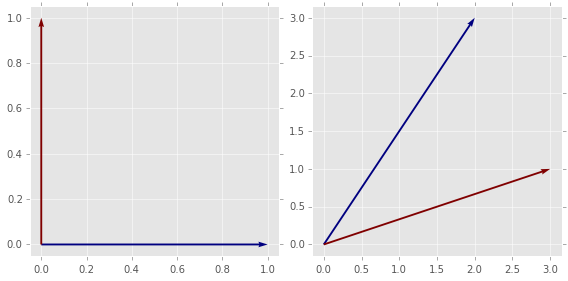

In [128]:
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,3],[3,1]])
v1=A.dot(e1)
v2=A.dot(e2)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([v1,v2])
plt.tight_layout()
#help(plt.Circle)
plt.Circle(np.array([0,0]),radius=1)
plt.Circle.draw


There is a more abstract formulation of an inner product, that is useful when considering more general vector spaces, especially function vector spaces:

### General Inner Product

We'll state the definition for vector spaces over $\mathbb{R}$, but note that all may be extended for any field of coefficients.

An inner product on a vector space $V$ is a symmetric, positive definite, bilinear form. This means an inner product is any map $<,>_A$ (the A is just to make the point that this is different from the standard inner product).

$$<,>_A: V\times V:\rightarrow \mathbb{R}$$

with the following properties:

* Symmetric: For any $v_1,v_2\in V\times V$, 
  $$<v_1,v_2>_A = <v_2,v_1>_A$$
* Positive Definite: For any $v\in V$,
  $$<v,v>_A \geq 0$$
  with equality *only* when $v=0$ (note that $0$ means the zero *vector*).
* Bilinear: For any $c_1,c_2\in\mathbb{R}$ and $v_1,v_2,v\in V$,
  $$<c(v_1+v_2),v>_A = c<v_1,v> + c<v_2,v>$$
  Note that symmetry gives that this is true for the second component. This means that the inner product is linear   in each of its two components.
  
##### Important: Any inner product defines a norm via
$$||v|| = <v,v>^{\frac12}$$

We will discuss this a bit more when we learn about positive-definite matrices!

### General Norms

There is also a more abstract definition of a norm - a norm is function from a vector space to the real numbers, that is positive definite, absolutely scalable and satisfies the triangle inequality.

We'll mostly be dealing with norms that come from inner products, but it is good to note that not all norms *must* come from an inner product.

### Outer Products

Note that the inner product is just matrix multiplication of a $1\times n$ vector with an $n\times 1$ vector.  In fact, we may write:

$$<v,w> = v^tw$$

The *outer product* of two vectors is just the opposite. It is given by:

$$v\otimes w = vw^t$$

Note that I am considering $v$ and $w$ as *column* vectors.  The result of the inner product is a *scalar*. The result of the outer product is a *matrix*.

#### Example

In [7]:
np.outer(v,w)

array([[1, 1],
       [2, 2]])

**Extended example**: the covariance matrix is an outer proudct.

In [8]:
# We have n observations of p variables 
n, p = 10, 4
v = np.random.random((p,n))

In [9]:
# The covariance matrix is a p by p matrix
np.cov(v)

array([[ 0.1055, -0.0437,  0.0352, -0.0152],
       [-0.0437,  0.055 , -0.0126,  0.0324],
       [ 0.0352, -0.0126,  0.1016,  0.0552],
       [-0.0152,  0.0324,  0.0552,  0.1224]])

In [10]:
# From the definition, the covariance matrix 
# is just the outer product of the normalized 
# matrix where every variable has zero mean
# divided by the number of degrees of freedom
w = v - v.mean(1)[:, np.newaxis]
w.dot(w.T)/(n - 1)

array([[ 0.1055, -0.0437,  0.0352, -0.0152],
       [-0.0437,  0.055 , -0.0126,  0.0324],
       [ 0.0352, -0.0126,  0.1016,  0.0552],
       [-0.0152,  0.0324,  0.0552,  0.1224]])

### Trace and Determinant of Matrices

The trace of a matrix $A$ is the sum of its diagonal elements.  It is important for a couple of reasons:

* It is an *invariant* of a matrix under change of basis (more on this later).
* It defines a matrix norm (more on that later)

The determinant of a matrix is defined to be the alternating sum of the product of permutations of the elements of a matrix.  

$$\det(A) = \sum_{\sigma \in S_n} sgn(\sigma) \prod_{i=1}^n a_{i,\sigma_i}$$

Let's not dwell on that though. It is important to know that the determinant of a $2\times 2$ matrix is

$$\left|\begin{matrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{matrix}\right| = a_{11}a_{22} - a_{12}a_{21}$$

This may be extended to an $n\times n$ matrix by minor expansion.  I will leave that for you to google.  We will be computing determinants using tools such as:

``np.linalg.det(A)``

What is most important about the determinant:

* Like the trace, it is also invariant under change of basis
* An $n\times n$ matrix $A$ is invertible $\iff$ det$(A)\neq 0$ 
* The rows(columns) of an $n\times n$ matrix $A$ are linearly independent $\iff$ det$(A)\neq 0$

In [11]:
n = 6
M = np.random.randint(100,size=(n,n))
print(M)
np.linalg.det(M)

[[61 36 46 92 50 76]
 [83 63 14 97 17 62]
 [17 26 12 94 61 50]
 [66  9 11 73  1 13]
 [37 98 82 69  3 65]
 [51 15  7 25 85 72]]


36971990469.0001

### Column space, Row space, Rank and Kernel

Let $A$ be an $m\times n$ matrix.  We can view the columns of $A$ as vectors, say $\textbf{a_1},...,\textbf{a_n}$. The space of all linear combinations of the $\textbf{a_i}$ are the *column space* of the matrix $A$.  Now, if $\textbf{a_1},...,\textbf{a_n}$ are *linearly independent*, then the column space is of dimension $n$.  Otherwise, the dimension of the column space is the size of the maximal set of linearly independent $\textbf{a_i}$.  Row space is exactly analogous, but the vectors are the *rows* of $A$.

The *rank* of a matrix *A* is the dimension of its column space - and - the dimension of its row space.  These are equal for any matrix.  Rank can be thought of as a measure of non-degeneracy of a system of linear equations, in that it is the *dimension of the image of the linear transformation* determined by $A$. 

The *kernel* of a matrix *A* is the dimension of the space mapped to zero under the linear transformation that $A$ represents. The dimension of the kernel of a linear transformation is called the *nullity*. 

Index theorem: For an $m\times n$ matrix $A$, 

rank($A$) + nullity($A$) = $n$.


### Matrix Norms

We can extend the notion of a norm of a vector to a norm of a matrix.  Matrix norms are used in determining the *condition* of a matrix (we will define this in the next lecture.)  There are many matrix norms, but three of the most common are so called 'p' norms, and they are based on p-norms of vectors.  So, for an $n$-dimensional vector $v$ and for $1\leq p <\infty$

$$||v||_p = \left(\sum\limits_{i=1}^n |v_i|^p\right)^\frac1p$$

and for $p =\infty$:

$$||v||_\infty = \max{|v_i|}$$

Similarly, the corresponding matrix norms are:

$$||A||_p = \sup_x \frac{||Ax||_p}{||x||_p}$$

$$||A||_{1} = \max_j\left(\sum\limits_{i=1}^n|a_{ij}|\right)$$ 
(column sum)

$$||A||_{\infty} = \max_i\left(\sum\limits_{j=1}^n|a_{ij}|\right)$$ 
(row sum)

FACT: The matrix 2-norm, $||A||_2$ is given by the largest eigenvalue of $\left(A^TA\right)^\frac12$ - otherwise known as the largest singular value of $A$.  We will define eigenvalues and singular values formally in the next lecture.


Another norm that is often used is called the Frobenius norm.  It one of the simplests to compute:

$$||A||_F = \left(\sum\sum \left(a_{ij}\right)^2\right)^\frac12$$

### Special Matrices

Some matrices have interesting properties that allow us either simplify the underlying linear system or to understand more about it. 

#### Square Matrices

Square matrices have the same number of columns (usually denoted $n$).  We refer to an arbitrary square matrix as and $n\times n$ or we refer to it as a 'square matrix of dimension $n$'.  If an $n\times n$ matrix $A$ has *full rank* (i.e. it has rank $n$), then $A$ is invertible, and its inverse is unique.  This is a situation that leads to a unique solution to a linear system.

#### Diagonal Matrices

A diagonal matrix is a matrix with all entries off the diagonal equal to zero.  Strictly speaking, such a matrix should be square, but we can also consider rectangular matrices of size $m\times n$ to be diagonal, if all entries $a_{ij}$ are zero for $i\neq j$

#### Symmetric and Skew Symmetric

A matrix $A$ is (skew) symmetric iff $a_{ij} = (-)a_{ji}$.

Equivalently, $A$ is (skew) symmetric iff

$$A = (-)A^T$$

#### Upper and Lower Triangular

A matrix $A$ is (upper|lower) triangular if $a_{ij} = 0$ for all $i (>|<) j$

#### Banded and Sparse Matrices

These are matrices with lots of zero entries. Banded matrices have non-zero 'bands', and this structure can be exploited to simplify computations.  Sparse matrices are matrices where there are 'few' non-zero entries, but there is no pattern to where non-zero entries are found.

#### Orthogonal and Orthonormal

A matrix $A$ is *orthogonal* iff

$$A A^T = I$$

In other words, $A$ is orthogonal iff 

$$A^T=A^{-1}$$

Facts: 

* The rows and columns of an orthogonal matrix are an orthonormal set of vectors.
* Geometrically speaking, orthogonal transformations preserve lengths and angles between vectors


#### Positive Definite

Positive definite matrices are an important class of matrices with very desirable properties. A square matrix $A$ is positive definite if

$$u^TA u > 0$$

for any non-zero n-dimensional vector $u$.

A symmetric, positive-definite matrix $A$ is a positive-definite matrix such that

$$A = A^T$$

IMPORTANT: 

* Symmetric, positive-definite matrices have 'square-roots' (in a sense)
* Any symmetric, positive-definite matrix is *diagonizable*!!!
* Co-variance matrices are symmetric and positive-definite


Now that we have the basics down, we can move on to numerical methods for solving systems - aka matrix decompositions.

<font color=red>Exercises</font>
----

**1**. Determine whether the following system of equations has no solution, infinite solutions or a unique solution *without solving the system*

$$\begin{eqnarray*}
x+2y-z+w &=& 2\\
3x-4y+2 w &=& 3\\
2y+z &=& 4\\
2x+2y-3z+2w&=&0\\
-2x+6y-z-w&=&-1
\end{eqnarray*}$$

In [16]:
A = np.array([[1,2,-1,1,2],[3,-4,0,2,3],[0,2,1,0,4],[2,2,-3,2,0],[-2,6,-1,-1,-1]])

np.linalg.matrix_rank(A)
np.linalg.det(A)

0.0000

**2**. Let $f(x)$ be a linear transformation of $\mathbb{R}^3$ such that
$$\begin{eqnarray*}
f(e_1) &=& (1,1,3)\\
f(e_2) &=& (1,0,4)\\
f(e_3) &=& (0,2,1)
\end{eqnarray*}$$

* Find a matrix representation for $f$. 
* Compute the matrix representation for $f$ in the basis$$\begin{eqnarray*}
v_1 &=& (2,3,3)\\
v_2 &=& (8,5,2)\\
v_3 &=& (1,0,5)
\end{eqnarray*}$$
